In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vae import VAE

import torch
from torchvision.datasets import CIFAR10
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [3]:
!tree lightning_logs

lightning_logs
└── version_0
    ├── checkpoints
    │   └── epoch=25.ckpt
    ├── events.out.tfevents.1598564386.beast.18931.0
    └── hparams.yaml

2 directories, 3 files


In [25]:
vae = VAE.load_from_checkpoint("lightning_logs/version_0/checkpoints/epoch=33.ckpt")
vae.eval();

In [26]:
ds = CIFAR10("data", train=False, transform=T.ToTensor())

In [27]:
example = 6

In [28]:
img = ds[example][0]
with torch.no_grad():
    mu = vae.encode(img.unsqueeze(0))[0]
    reconst = vae.decode(mu).squeeze()

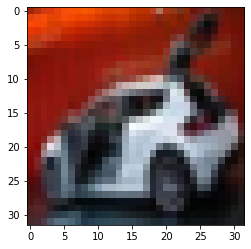

In [29]:
plt.imshow(img.permute(1, 2, 0).numpy())

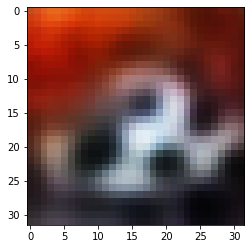

In [31]:
plt.imshow(reconst.permute(1, 2, 0).numpy())

In [76]:
with torch.no_grad():
    z = torch.randn_like(mu)
    gen = vae.decode(z).squeeze()

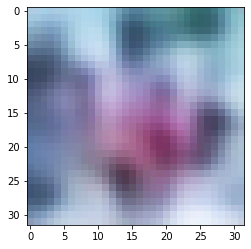

In [77]:
plt.imshow(gen.permute(1, 2, 0).numpy())